# Application of Genetic Algorithm and Neural Networks in Stock Trading

In [1]:
import numpy as np
from network import flatten_NN, reconstruct_NN
from typing import List, Tuple
from mate import mate
import pandas as pd
import matplotlib.pyplot as plt
from helper_module import split_train_set, split_train_test_sets
from numpy.typing import NDArray
from fitness import fitness, regime, compute_population_fitness, evaluate_nn
from initialize_nn import initialize_nn
from initialize_population import initialize_population
from selection import keep_elites, selection
import random
from mate import mate, reproduce_population, reduce_population
from checkpoint import checkpoint, load_checkpoint
from evolution import run_evolution
import os

                Close       Open       High        Low   Volume
Date                                                           
1986-01-02   172.6575   172.6575   172.6575   172.6575    600.0
1986-01-03   172.6575   172.6575   172.6575   172.6575   1900.0
1986-01-06   175.4879   175.4879   175.4879   175.4879   2800.0
1986-01-07   181.1488   175.4879   181.1488   175.4879   3200.0
1986-01-09   181.1488   181.1488   181.1488   181.1488   2600.0
...               ...        ...        ...        ...      ...
2023-09-12  1781.0000  1786.0000  1809.0000  1781.0000  12985.0
2023-09-13  1787.0000  1799.0000  1799.0000  1781.0000  16850.0
2023-09-14  1795.0000  1795.0000  1795.0000  1782.0000  12070.0
2023-09-15  1752.0000  1795.0000  1810.0000  1752.0000  29105.0
2023-09-18  1752.0000  1789.0000  1789.0000  1752.0000  27225.0

[8861 rows x 5 columns]


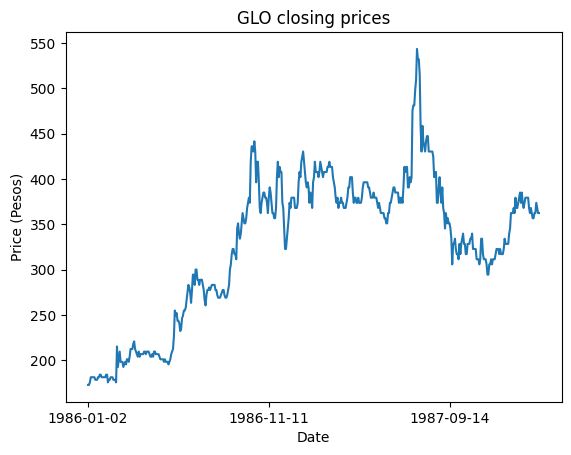

In [2]:
# read and print sample historical stock price data
series = pd.read_csv('../../Data/PH-historical-stock-price-data-csv/GLO.csv', header = 0, index_col = 'Date')
print(series)

# plot historical stock price data
fig, ax = plt.subplots()    
ax.set_title('GLO closing prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price (Pesos)')
ax.plot(series['Close'].head(500))
ax.set_xticks(ax.get_xticks()[::200])
plt.show()

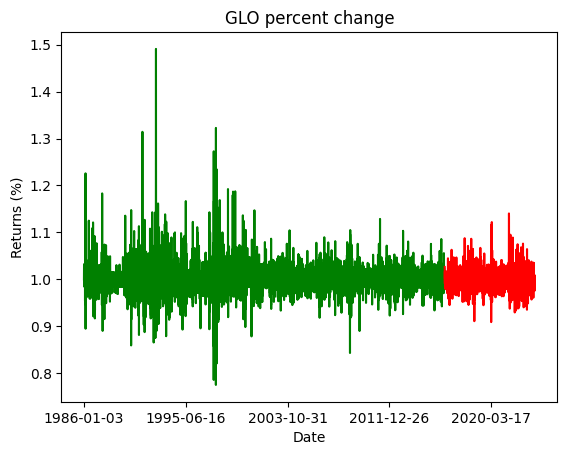

In [3]:
# use only the closing prices of the stock
series = series['Close']
series = series.pct_change(1) + 1
series = pd.Series(data = series, name = 'Close_pct_change')

# split data into train and test sets
train, test = split_train_test_sets(series)

# plot the train and test sets
fig, ax = plt.subplots()    
ax.set_title('GLO percent change')
ax.set_xlabel('Date')
ax.set_ylabel('Returns (%)')
ax.plot(train, 'g')
ax.plot(test, 'r')
ax.set_xticks(ax.get_xticks()[::2000])
plt.show()

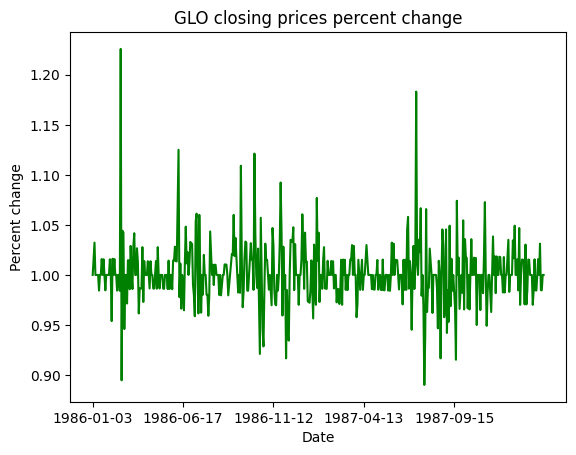

In [4]:
# split the train set into multiple batches
train_set = split_train_set(train)

# plot a sample of the train set
fig, ax = plt.subplots()    
ax.set_title('GLO closing prices percent change')
ax.set_xlabel('Date')
ax.set_ylabel('Percent change')
ax.plot(train_set[0], 'g')
ax.set_xticks(ax.get_xticks()[::100])
plt.show()

In [5]:
population = list()
population = initialize_population(num_individuals=100)
WINDOW = 150
MAX_POPULATION = 100
MUTATION_RATE = 0.1
NUM_GENERATIONS = 100
CHECKPOINT_FILEPATH = './checkpoint'
CHECKPOINT_INTERVAL = 10
ENABLE_HYPERMUTATION = True
DROPOUT_RATE = 0.1

# start from generation 0
# population = run_evolution(population = population,
#                            window = WINDOW, 
#                            num_generations = NUM_GENERATIONS, 
#                            train_set = train_set,
#                            checkpoint_filepath = CHECKPOINT_FILEPATH,
#                            checkpoint_interval = CHECKPOINT_INTERVAL,
#                            mutation_rate = MUTATION_RATE,
#                            enable_hypermutation = ENABLE_HYPERMUTATION,
#                            dropout_rate = DROPOUT_RATE)

In [6]:
# uncomment this cell if starting from a checkpoint
population = load_checkpoint(checkpoint_filepath = './checkpoint/40.pkl')
population = run_evolution(population = population,
                           window = WINDOW, 
                           starting_generation = 41, 
                           num_generations = NUM_GENERATIONS, 
                           train_set = train_set, 
                           checkpoint_filepath = CHECKPOINT_FILEPATH,
                           checkpoint_interval = CHECKPOINT_INTERVAL,
                           mutation_rate = MUTATION_RATE,
                           enable_hypermutation = ENABLE_HYPERMUTATION,
                           dropout_rate = DROPOUT_RATE)

Generation: 41 -> 1.34
Generation: 42 -> 99.29
Generation: 43 -> -5.31
Generation: 44 -> -13.09
Generation: 45 -> 64.38
Generation: 46 -> 5.63
Generation: 47 -> -4.80
Generation: 48 -> -6.11
Generation: 49 -> 13.80
Generation: 50 -> -9.59
Generation: 51 -> -10.91
Generation: 52 -> -0.06
Generation: 53 -> 18.87
Generation: 54 -> 13.58
Generation: 55 -> 12.74
Generation: 56 -> 22.38
Generation: 57 -> -343.71
Generation: 58 -> -13.72
Generation: 59 -> 44.75
Generation: 60 -> -8.53
Generation: 61 -> 18.06
Generation: 62 -> 21.85
Generation: 63 -> 67.05
Generation: 64 -> 9.47
Generation: 65 -> 27.24
Generation: 66 -> 33.77
Generation: 67 -> -4.28
Generation: 68 -> -10.37
Generation: 69 -> 16.11
Generation: 70 -> 16.68
Generation: 71 -> 32.10
Generation: 72 -> 51.80
Generation: 73 -> 58.92
Generation: 74 -> 149.81
Generation: 75 -> 34.31
Generation: 76 -> 17.64
Generation: 77 -> -15.53
Generation: 78 -> 2.64
Generation: 79 -> 36.29
Generation: 80 -> 44.85
Generation: 81 -> 45.79
Generation: 

In [7]:
for i in range(10):
    test_sample = np.zeros([1,150])
    for i in range(150):
        test_sample[0][i] = np.random.uniform(0,1)

    probabilities = population[0].propagate_forward(test_sample)
    index = np.argmax(probabilities)
    print(probabilities, index)

[[1.07745345e-02 9.89225156e-01 3.09439014e-07]] 1
[[1.00000000e+00 1.77499064e-11 2.48084178e-16]] 0
[[8.98161477e-03 9.91018385e-01 2.20585154e-14]] 1
[[9.89034360e-01 1.09656235e-02 1.62810064e-08]] 0
[[8.10226789e-03 9.91897680e-01 5.20306405e-08]] 1
[[9.99999980e-01 1.99808856e-08 6.07565748e-19]] 0
[[6.76632431e-02 9.32336757e-01 7.38723750e-14]] 1
[[9.99998389e-01 1.61088824e-06 5.87179977e-14]] 0
[[4.37353970e-02 8.57443255e-06 9.56256029e-01]] 2
[[1.63105883e-05 9.99983674e-01 1.51415770e-08]] 1


In [8]:
for individual in population:
    print(individual.fitness)

72.6706297170715
72.6706297170715
72.6706297170715
51.81361724681499
48.1440882184812
45.60251355739995
44.96714554083994
44.96714554083994
43.38412275280224
43.38412275280224


In [9]:
# from fitness import test_fitness
# test_fitness(nn = population[0], window = 150,  train_set = train_set[0], regime = regime)

In [10]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(series)

In [32]:
# test_fitness, test_bnh_returns, test_strat_returns, test_max_drawdown, test_series, test_strat_sortino_ratio, test_num_trades = evaluate_nn(nn = population[0], train_set = train_set[2500], regime = regime, window = 150)
# test_fitness, test_bnh_returns, test_strat_returns, test_max_drawdown, test_series, test_strat_sortino_ratio, test_num_trades = evaluate_nn(nn = population[2], train_set = train, regime = regime, window = 150)
test_fitness, test_bnh_returns, test_strat_returns, test_max_drawdown, test_series, test_strat_sortino_ratio, test_num_trades = evaluate_nn(nn = population[5], train_set = test, regime = regime, window = 150)

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(test_series)

            Close_pct_change  Regime   Returns  Cumulative_Returns
Date                                                              
2016-06-21          1.026316     NaN  1.000000            0.000000
2016-06-22          1.018803     NaN  1.000000            0.000000
2016-06-23          0.999161     NaN  1.000000            0.000000
2016-06-24          0.990764     NaN  1.000000            0.000000
2016-06-27          1.016949     NaN  1.000000            0.000000
2016-06-28          1.001667     NaN  1.000000            0.000000
2016-06-29          1.006656     NaN  1.000000            0.000000
2016-06-30          0.980165     NaN  1.000000            0.000000
2016-07-01          0.994941     NaN  1.000000            0.000000
2016-07-04          0.999153     NaN  1.000000            0.000000
2016-07-05          0.999152     NaN  1.000000            0.000000
2016-07-07          0.997453     NaN  1.000000            0.000000
2016-07-08          1.002553     NaN  1.000000            0.00

In [34]:
print(test_bnh_returns)
print(test_fitness)
print(test_strat_returns)
print(test_num_trades)
print(test_max_drawdown)

-23.157894736842223
-239.56726104892093
-0.6616729088640416
49
0.5936639118457286


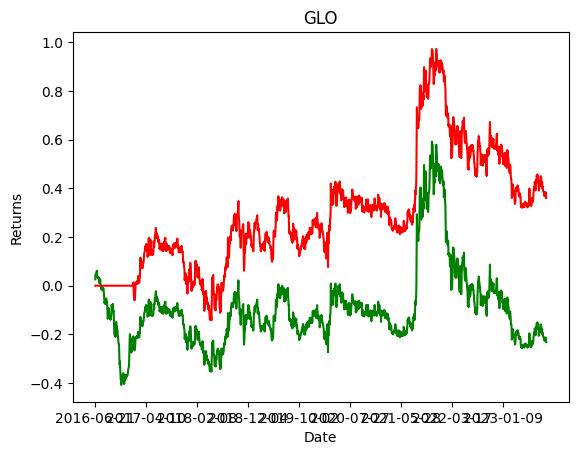

In [35]:
test_series['bnh'] = test_series['Close_pct_change'].cumprod() - 1

# plot historical stock price data
fig, ax = plt.subplots()    
ax.set_title('GLO')
ax.set_xlabel('Date')
ax.set_ylabel('Returns')
ax.plot(test_series.index, test_series['bnh'], color = 'g')
ax.plot(test_series.index, test_series['Cumulative_Returns'], color = 'r')
ax.set_xticks(ax.get_xticks()[::200])
plt.show()

In [15]:
# checkpoint(population = population, generation_number = 99999, checkpoint_filepath = './checkpoint')

In [16]:
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])
# clustering = DBSCAN(eps=3, min_samples=2).fit(X)
# print(clustering.labels_)
# DBSCAN(eps=3, min_samples=2)